# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

# Business Objective

* To understand the demand for shared bikes among the people after this ongoing quarantinesituation ends across the nation due to Covid-19.

* To understand the factors affecting the demand for these shared bikes in the American market.

* The company wants to know:
  <br> a. Which variables are significant in predicting the demand for shared bikes. <br> 
  b. How well those variables describe the bike demands.

* To model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features.nds

### Step 1 : Data Fetching & Understanding



In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import math as mt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score



In [2]:
from importlib.metadata import version
print(version('pandas'))
print(version('matplotlib'))
print(version('seaborn'))
print(version('scikit-learn'))
print(version('statsmodels'))
print(version('numpy'))

1.5.3
3.7.2
0.12.2
1.3.0
0.14.0
1.24.4


In [3]:
#Import Data
df=pd.read_csv("day.csv")

In [4]:
df.shape

(730, 16)

##### Data has 730 records and 16 columns

In [5]:
#Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Step 2 : Data Cleaning
a. Removal of Duplicates.<br> b. Identifying and Treating Missing Values <br> c. Renaming categorical variable's value as per data dictionary as it makes more sense. <br>d. Identifying and Treating Outliers.

In [7]:
#Checking for duplicates
num_duplicates=df.duplicated().sum()

In [8]:
print("Numbber of duplicates : ",num_duplicates)

Numbber of duplicates :  0


No duplicates in the data

In [9]:
#Checking fo missing values
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No missing values in the data

In [10]:
#Renaming values in categorical variable to make it more readable data

In [11]:
#print(df.columns)
df.mnth = df.mnth.map({1: 'Jan', 2: 'Feb',3: 'Mar', 4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'})
df.season = df.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})
df.weathersit = df.weathersit.map({1:'Clear',2:'MistyCloudy', 
                                             3:'LightSnowRain',4:'HeavySnowRain'})
df.weekday = df.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})
#df.yr = df.yr.map({0:"2018",1:"2019"})
#df.holiday = df.holiday.map({0:"NotHoliday",1:"Holiday"})
#df.workingday = df.workingday.map({0:"NotWorkingDay",1:"WorkingDay"})

checking for outliers

In [12]:
# Function to calculate outliers using IQR
def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    outlier_percentage = outliers.mean() * 100
    return outlier_percentage.sum()

In [13]:
# Calculate outliers in each numeric column
numeric_cols = df.select_dtypes(include='number')
outlier_percentage = numeric_cols.apply(count_outliers_iqr)

In [14]:
print("Number of outliers in each numeric column : ",outlier_percentage)


Number of outliers in each numeric column :  instant       0.000000
yr            0.000000
holiday       2.876712
workingday    0.000000
temp          0.000000
atemp         0.000000
hum           0.273973
windspeed     1.780822
casual        6.027397
registered    0.000000
cnt           0.000000
dtype: float64


/tmp/ipykernel_832/1838720886.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


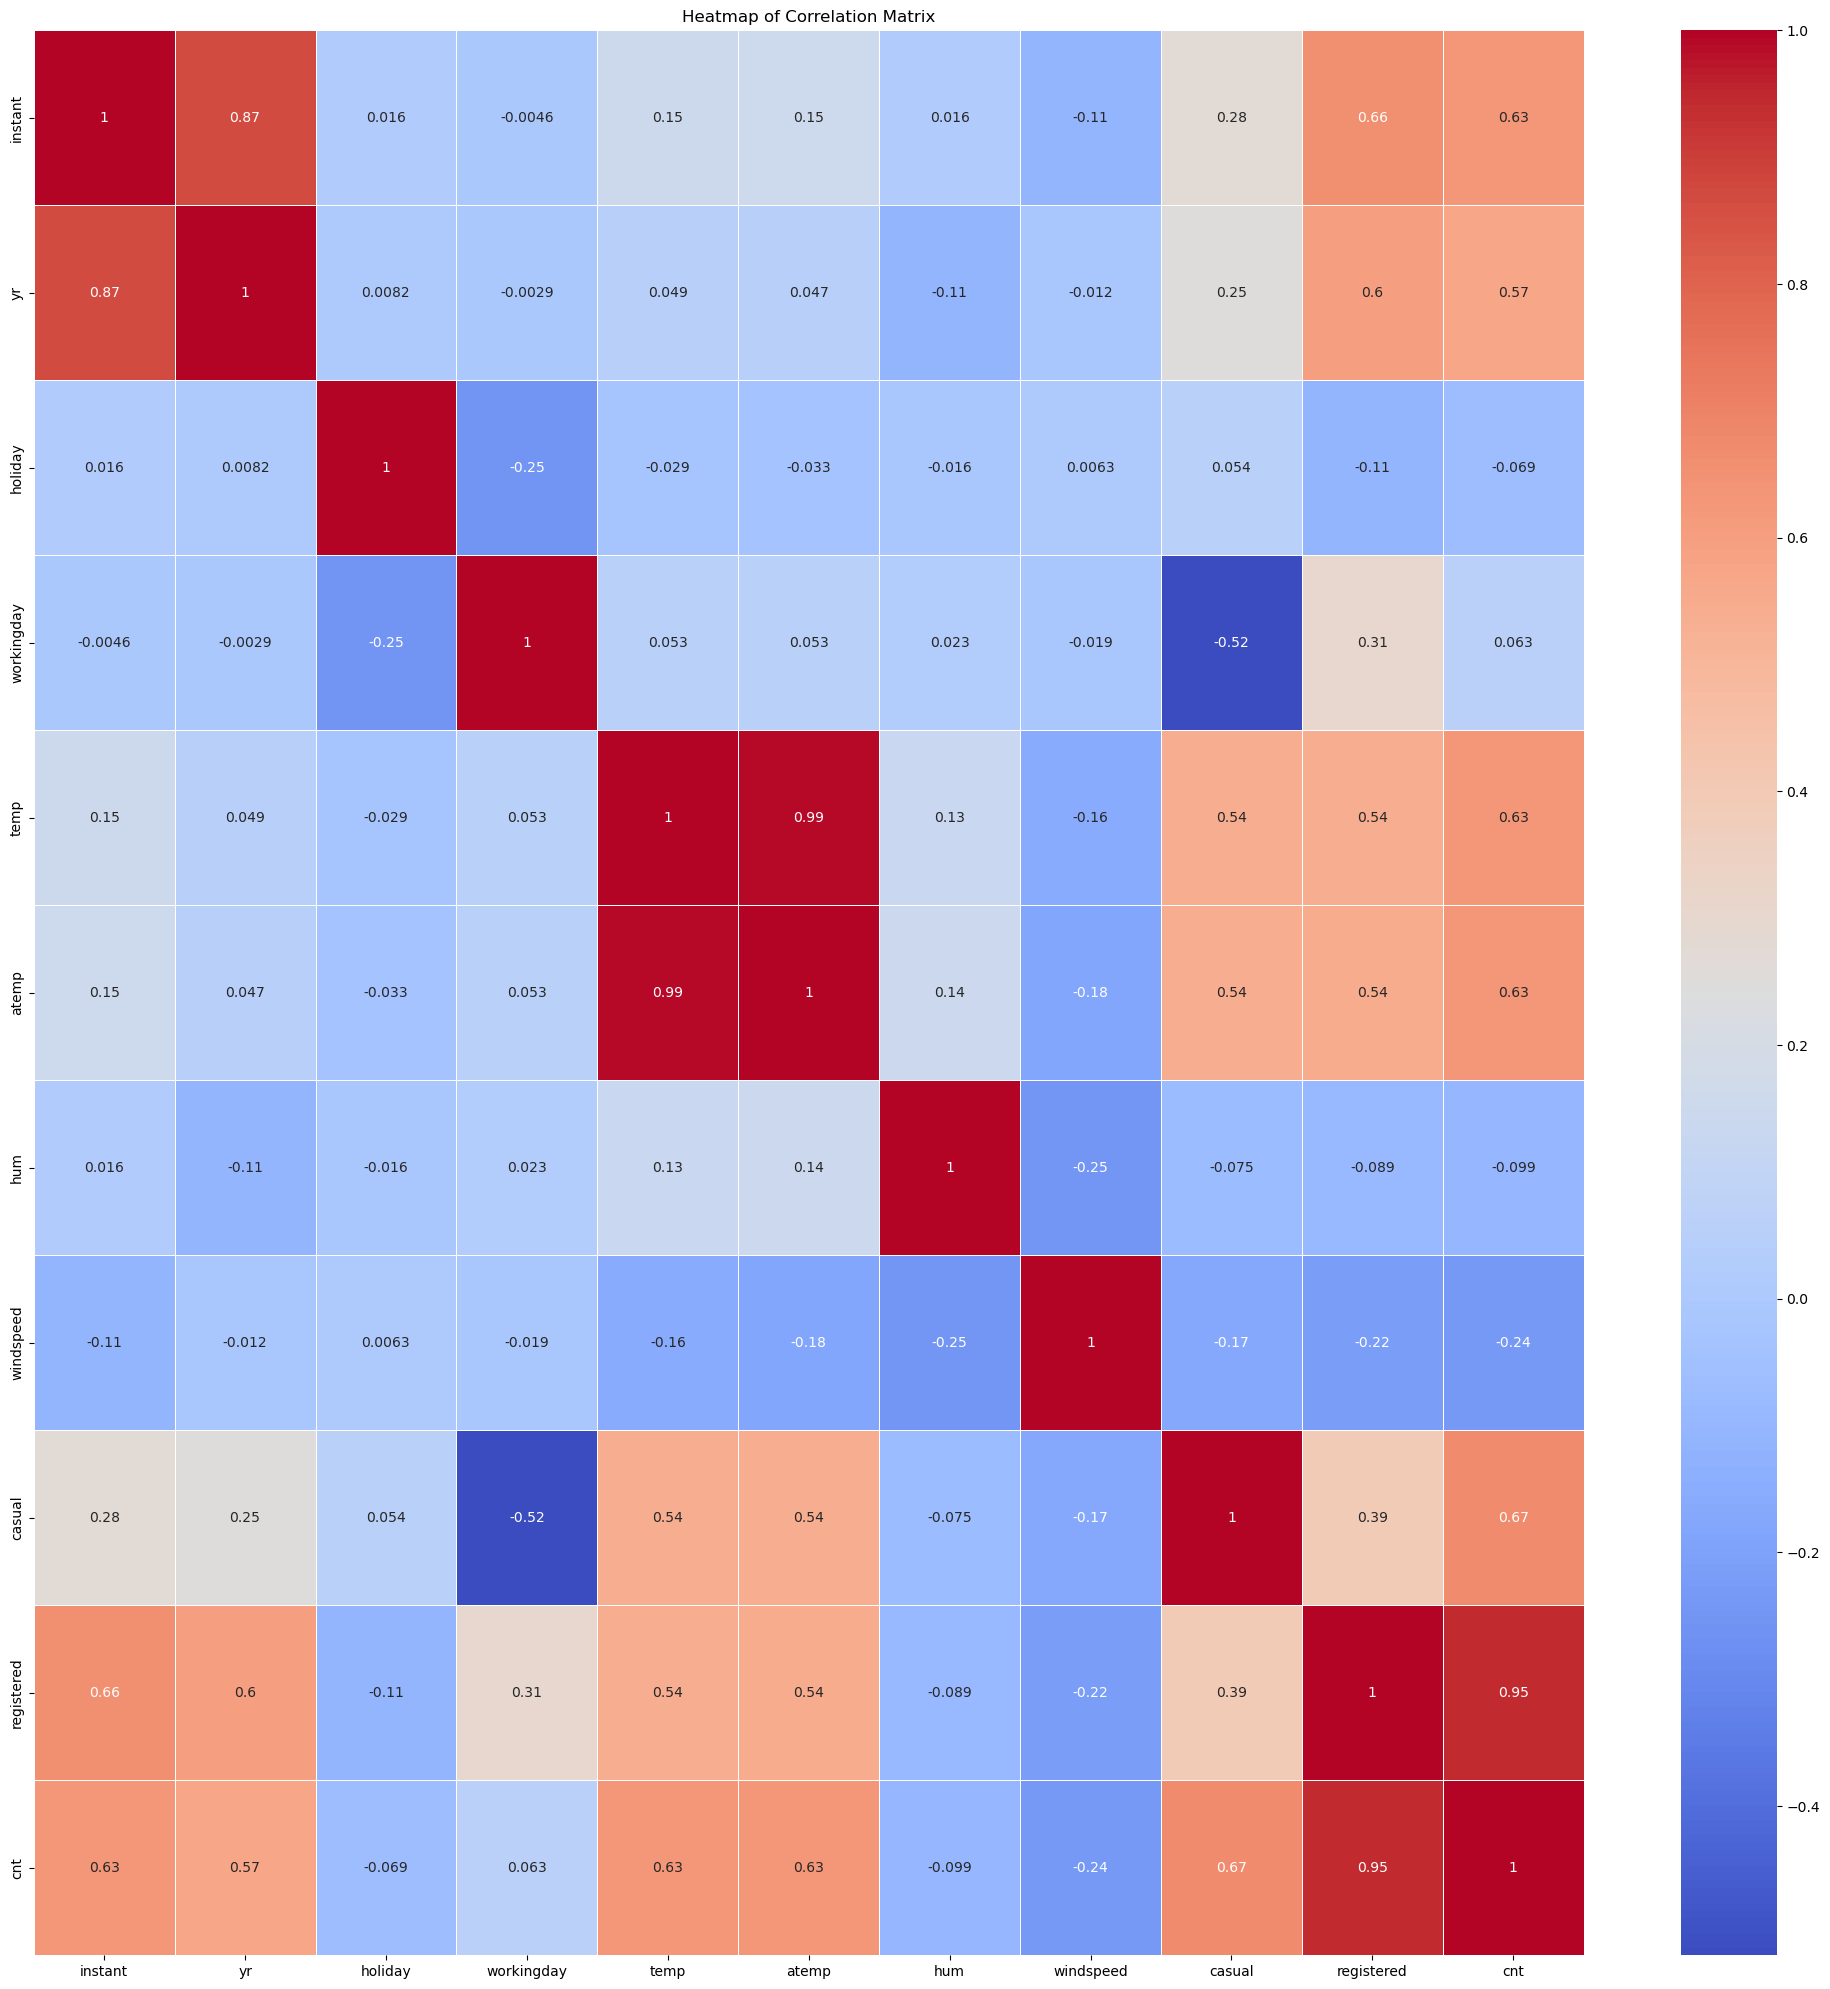

In [15]:
# Heatmap using Seaborn
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

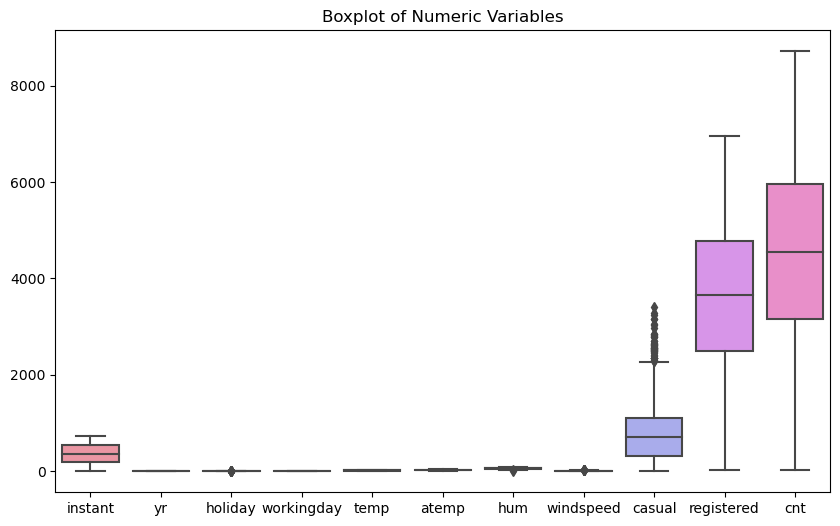

In [16]:
# Create a boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title('Boxplot of Numeric Variables')
plt.show()

In [17]:
#Descriptive Analysis of numeric variables
df.describe(percentiles=[.25, .5, .75, .98])

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
98%,715.420000,1.000000,1.000000,1.000000,32.999536,37.440100,90.830814,25.201627,2705.680000,6634.200000,7867.100000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


There are outliers in hum , windspeed and casual variable but they are close to max values and values makes sense ,So I am keeping the data as it is.

#### Removing belowing variables
* instant - as it is just index column
* dteday  - we can remove dteday as month , yr and create new week column from dteday

In [18]:
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')

In [19]:
# Extract week from 'dteday' column
df['week'] = df['dteday'].dt.isocalendar().week

In [20]:
#removing instant and dteday column
df.drop(columns=['instant', 'dteday'], inplace=True)

### Step 3 : Exploratory Data Analysis 

In [21]:
df.select_dtypes(include='number').columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'week'],
      dtype='object')

Variable :  yr
**********************************************************************


/tmp/ipykernel_832/3495449052.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


Descriptive statistics : 
************************************************************************
                                                                        
    count  mean       std  min  25%  50%  75%  95%  99%  max
yr  730.0   0.5  0.500343  0.0  0.0  0.5  1.0  1.0  1.0  1.0
                                                                        
                                                                        
Data Distribution


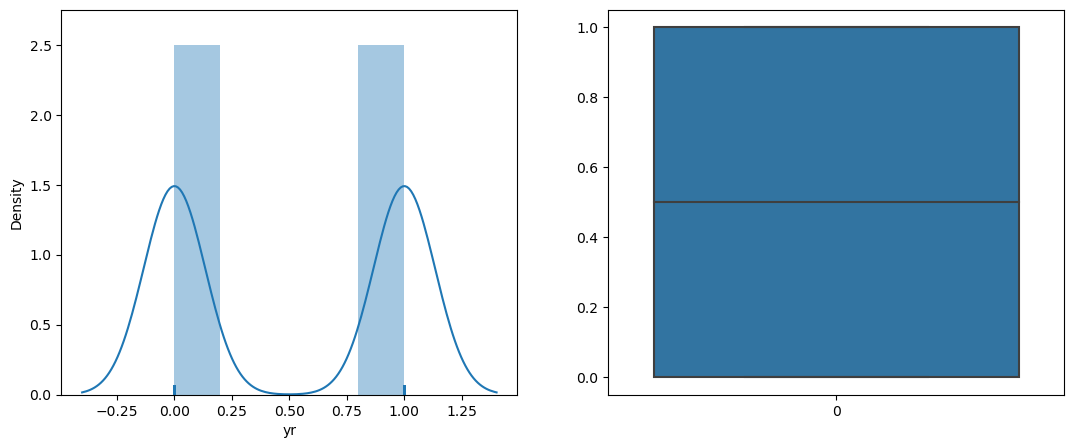

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  holiday
**********************************************************************


/tmp/ipykernel_832/3495449052.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


Descriptive statistics : 
************************************************************************
                                                                        
         count      mean       std  min  25%  50%  75%  95%  99%  max
holiday  730.0  0.028767  0.167266  0.0  0.0  0.0  0.0  0.0  1.0  1.0
                                                                        
                                                                        
Data Distribution


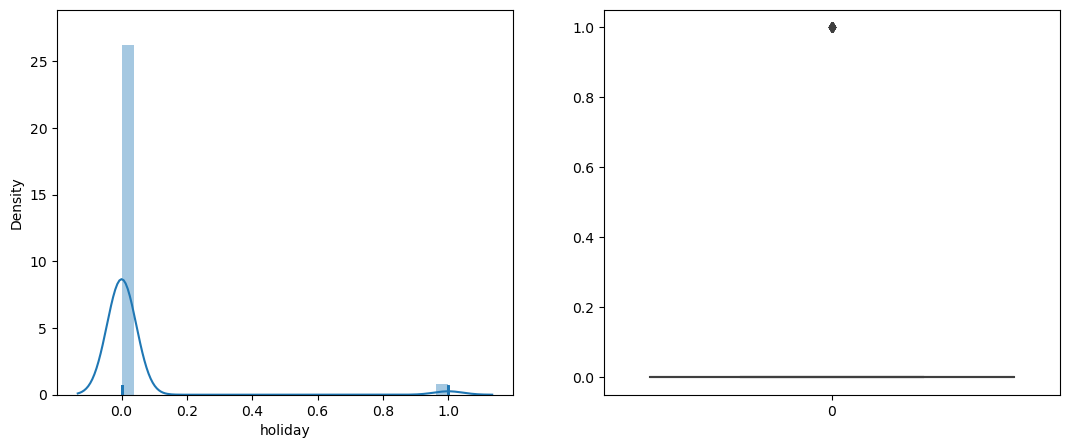

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  workingday
**********************************************************************


/tmp/ipykernel_832/3495449052.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


Descriptive statistics : 
************************************************************************
                                                                        
            count      mean       std  min  25%  50%  75%  95%  99%  max
workingday  730.0  0.683562  0.465405  0.0  0.0  1.0  1.0  1.0  1.0  1.0
                                                                        
                                                                        
Data Distribution


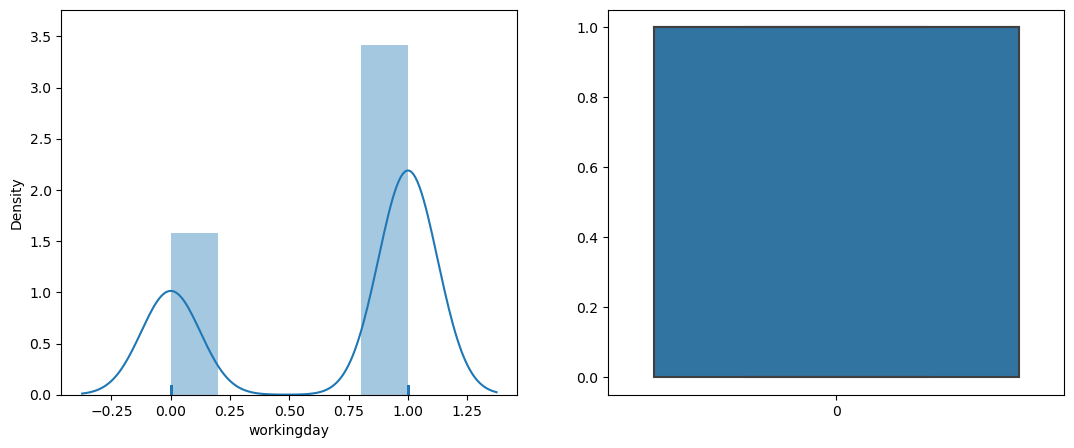

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  temp
**********************************************************************


/tmp/ipykernel_832/3495449052.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


Descriptive statistics : 
************************************************************************
                                                                        
      count       mean       std       min        25%        50%        75%  \
temp  730.0  20.319259  7.506729  2.424346  13.811885  20.465826  26.880615   

           95%       99%        max  
temp  31.52046  33.86805  35.328347  
                                                                        
                                                                        
Data Distribution


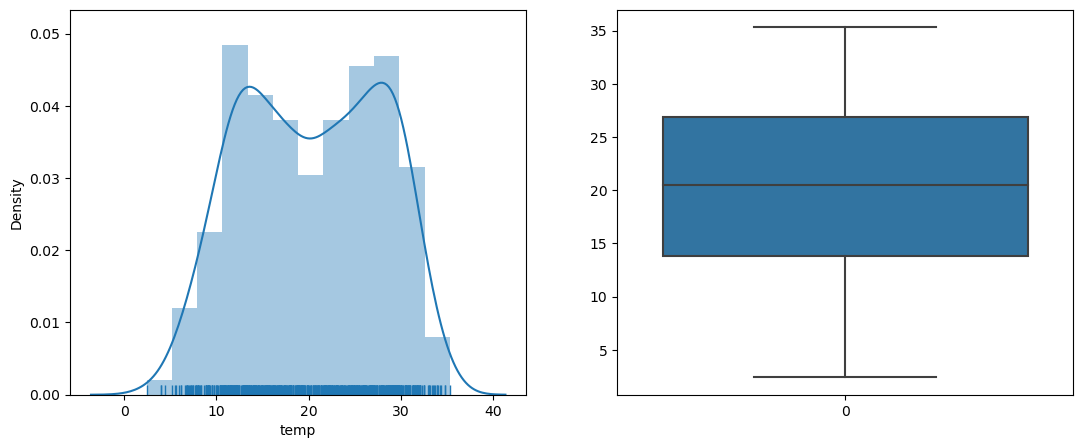

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  atemp
**********************************************************************
Descriptive statistics : 
************************************************************************
                                                                        
       count       mean       std      min        25%        50%        75%  \
atemp  730.0  23.726322  8.150308  3.95348  16.889713  24.368225  30.445775   

             95%       99%      max  
atemp  35.749975  38.94165  42.0448  
                                                                        
                                                                        
Data Distribution


/tmp/ipykernel_832/3495449052.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


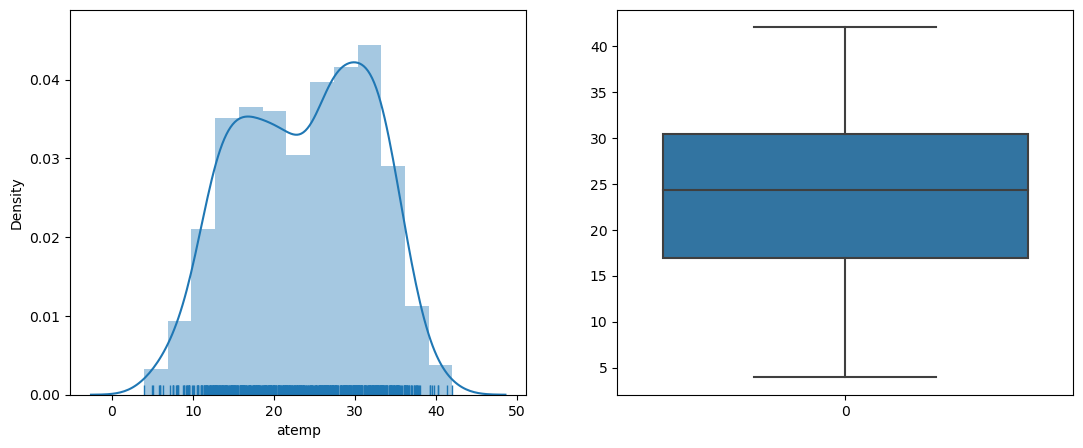

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  hum
**********************************************************************


/tmp/ipykernel_832/3495449052.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


Descriptive statistics : 
************************************************************************
                                                                        
     count       mean        std  min   25%     50%        75%        95%  \
hum  730.0  62.765175  14.237589  0.0  52.0  62.625  72.989575  86.868735   

           99%    max  
hum  92.795857  97.25  
                                                                        
                                                                        
Data Distribution


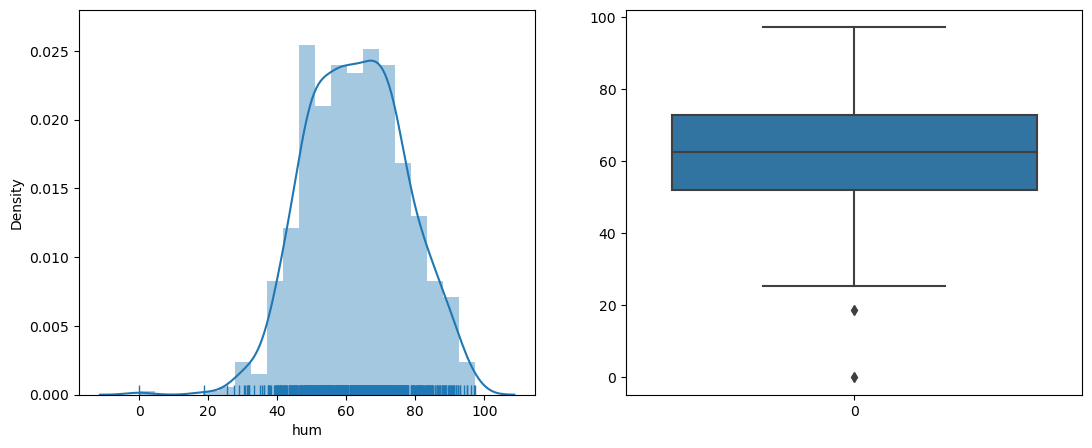

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  windspeed
**********************************************************************
Descriptive statistics : 
************************************************************************
                                                                        
           count      mean       std       min      25%        50%        75%  \
windspeed  730.0  12.76362  5.195841  1.500244  9.04165  12.125325  15.625589   

                 95%        99%        max  
windspeed  22.999988  27.380948  34.000021  
                                                                        
                                                                        
Data Distribution


/tmp/ipykernel_832/3495449052.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


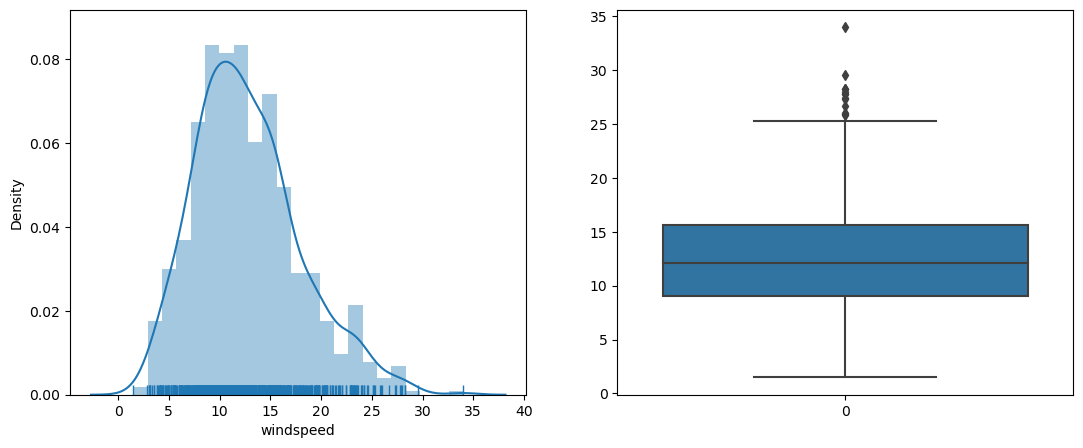

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  casual
**********************************************************************


/tmp/ipykernel_832/3495449052.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


Descriptive statistics : 
************************************************************************
                                                                        
        count        mean         std  min     25%    50%     75%     95%  \
casual  730.0  849.249315  686.479875  2.0  316.25  717.0  1096.5  2355.0   

            99%     max  
casual  2931.68  3410.0  
                                                                        
                                                                        
Data Distribution


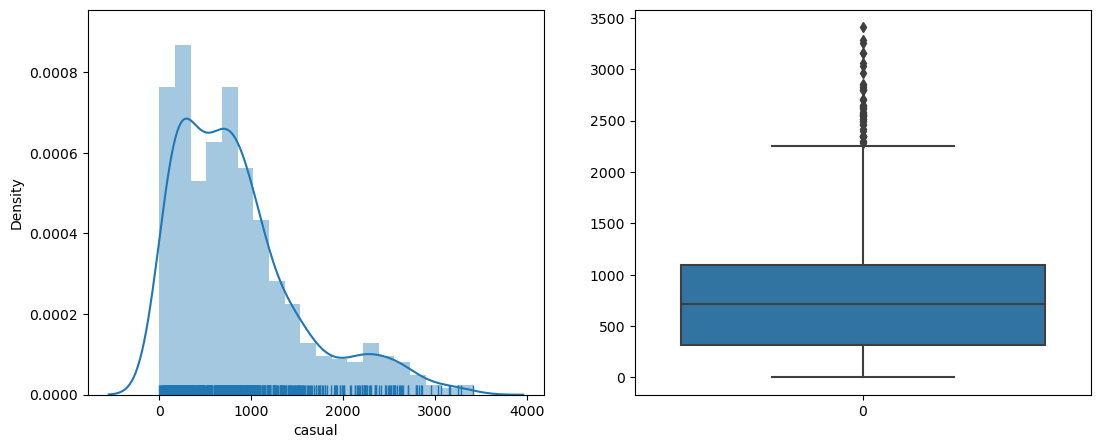

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  registered
**********************************************************************


/tmp/ipykernel_832/3495449052.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


Descriptive statistics : 
************************************************************************
                                                                        
            count         mean          std   min      25%     50%      75%  \
registered  730.0  3658.757534  1559.758728  20.0  2502.25  3664.5  4783.25   

                95%      99%     max  
registered  6280.55  6787.39  6946.0  
                                                                        
                                                                        
Data Distribution


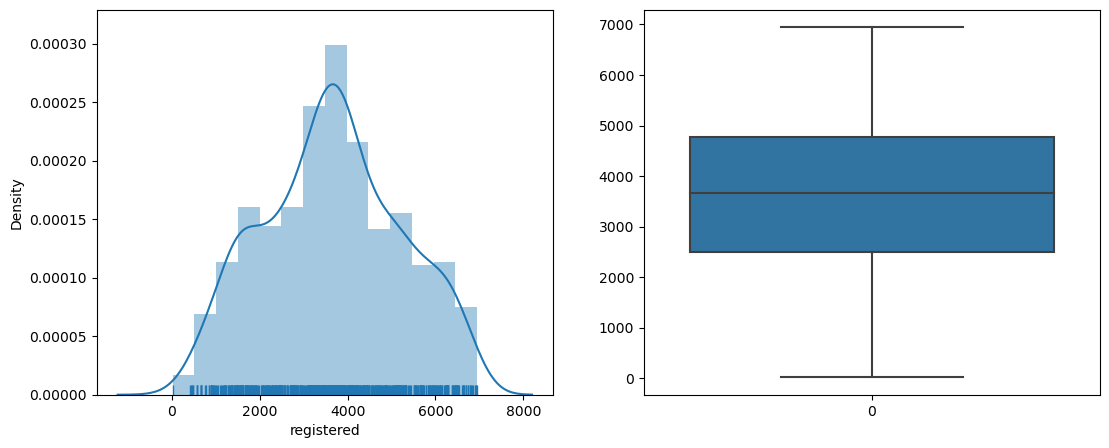

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  cnt
**********************************************************************
Descriptive statistics : 
************************************************************************
                                                                        
     count         mean          std   min      25%     50%     75%     95%  \
cnt  730.0  4508.006849  1936.011647  22.0  3169.75  4548.5  5966.0  7576.4   

         99%     max  
cnt  8163.81  8714.0  
                                                                        
                                                                        
Data Distribution


/tmp/ipykernel_832/3495449052.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


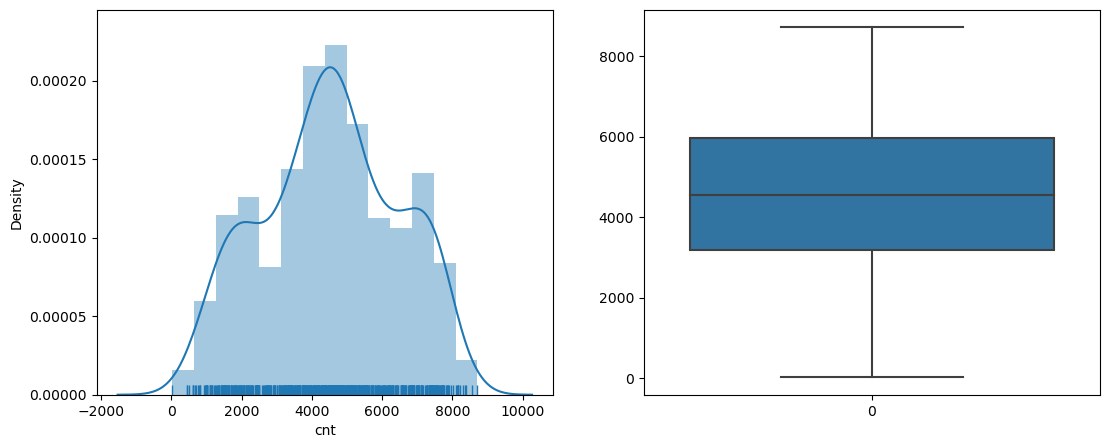

======================================================================End=============================================================================
                                                                        
                                                                        
Variable :  week
**********************************************************************


/tmp/ipykernel_832/3495449052.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p1 = sns.distplot(df[i], rug=True)


Descriptive statistics : 
************************************************************************
                                                                        
      count       mean        std  min   25%   50%   75%   95%   99%   max
week  730.0  26.430137  15.057227  1.0  13.0  26.0  39.0  50.0  52.0  52.0
                                                                        
                                                                        
Data Distribution


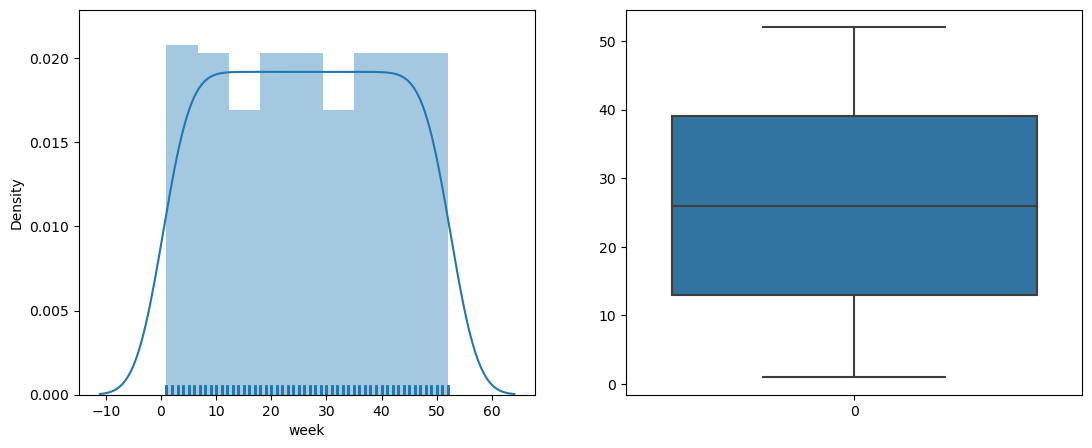

======================================================================End=============================================================================
                                                                        
                                                                        


In [22]:
#Descriptive Analysis & Data Distribution
for i in df.select_dtypes(include='number').columns:
    print("Variable : ",i)
    print("**********************************************************************")
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    p1 = sns.distplot(df[i], rug=True)
    plt.subplot(1,3,2)
    p2 =sns.boxplot(df[i], orient="V")
    print("Descriptive statistics : ")
    print("************************************************************************")
    print("                                                                        ")
    print(pd.DataFrame(df[i].describe(percentiles=[0.25,0.75,0.95,0.99])).T)
    print("                                                                        ")
    print("                                                                        ")
    print("Data Distribution")
    plt.show()
    print("======================================================================End=============================================================================")
    print("                                                                        ")
    print("                                                                        ")
    #plt.savefig(i+'univariate.jpg')

In [23]:
cat_variable_list=['mnth', 'season', 'weathersit', 'weekday', 'yr', 'holiday', 'workingday']

Variable :  mnth


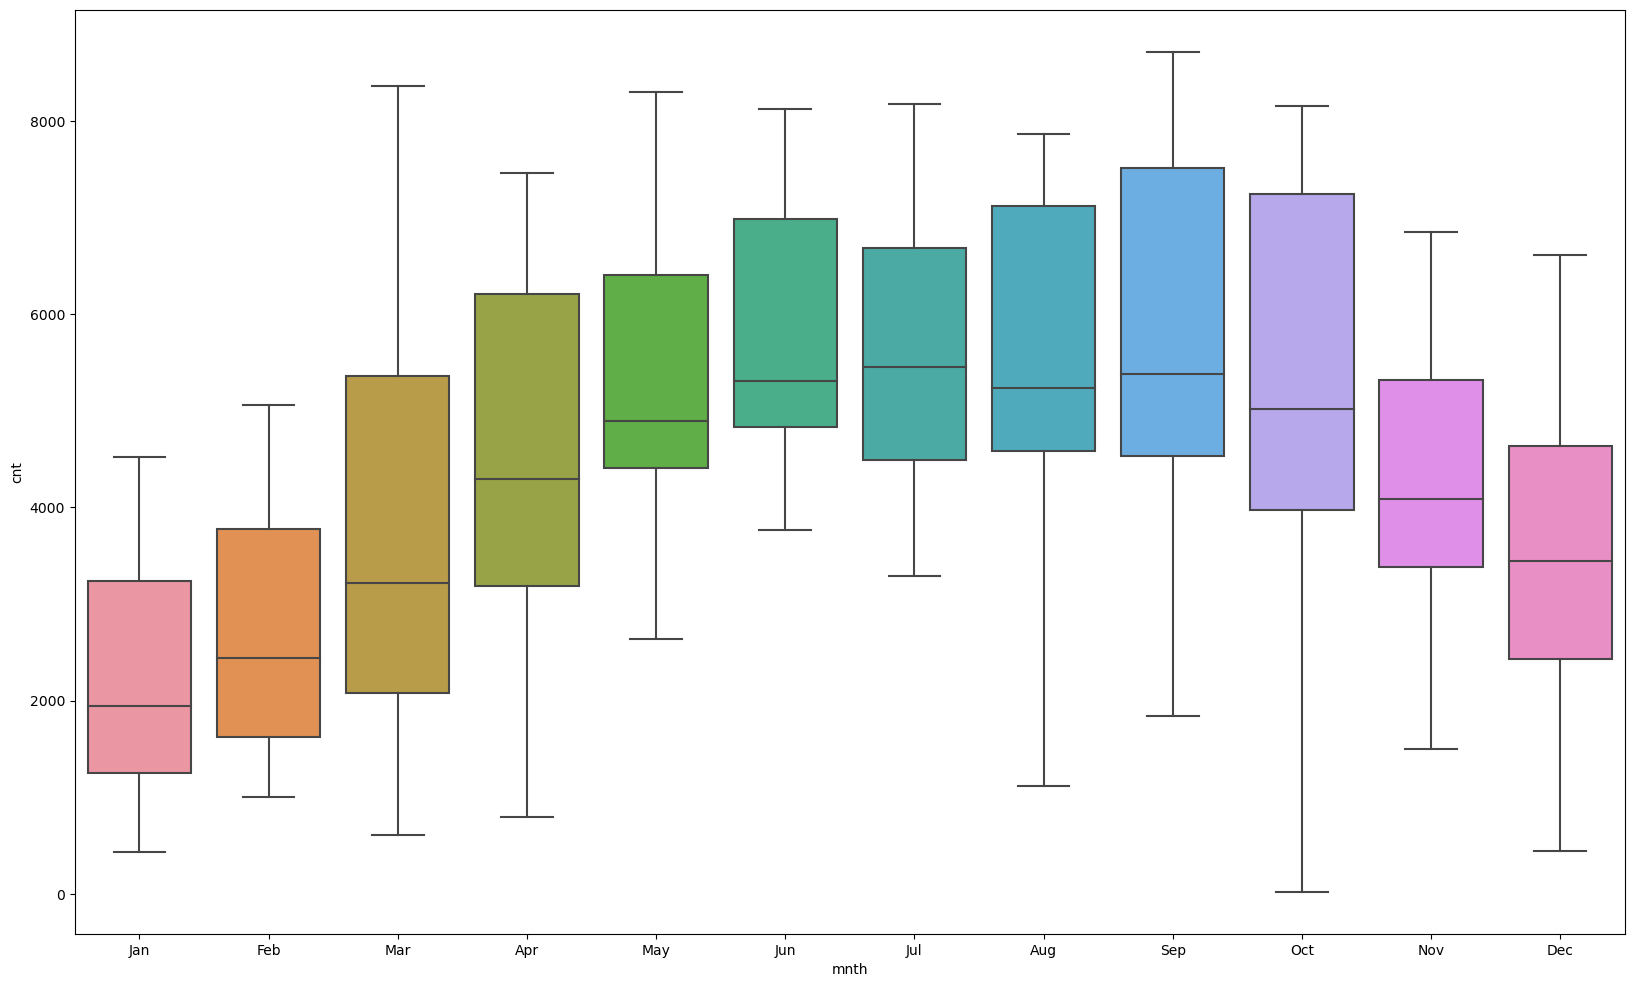

Variable :  season


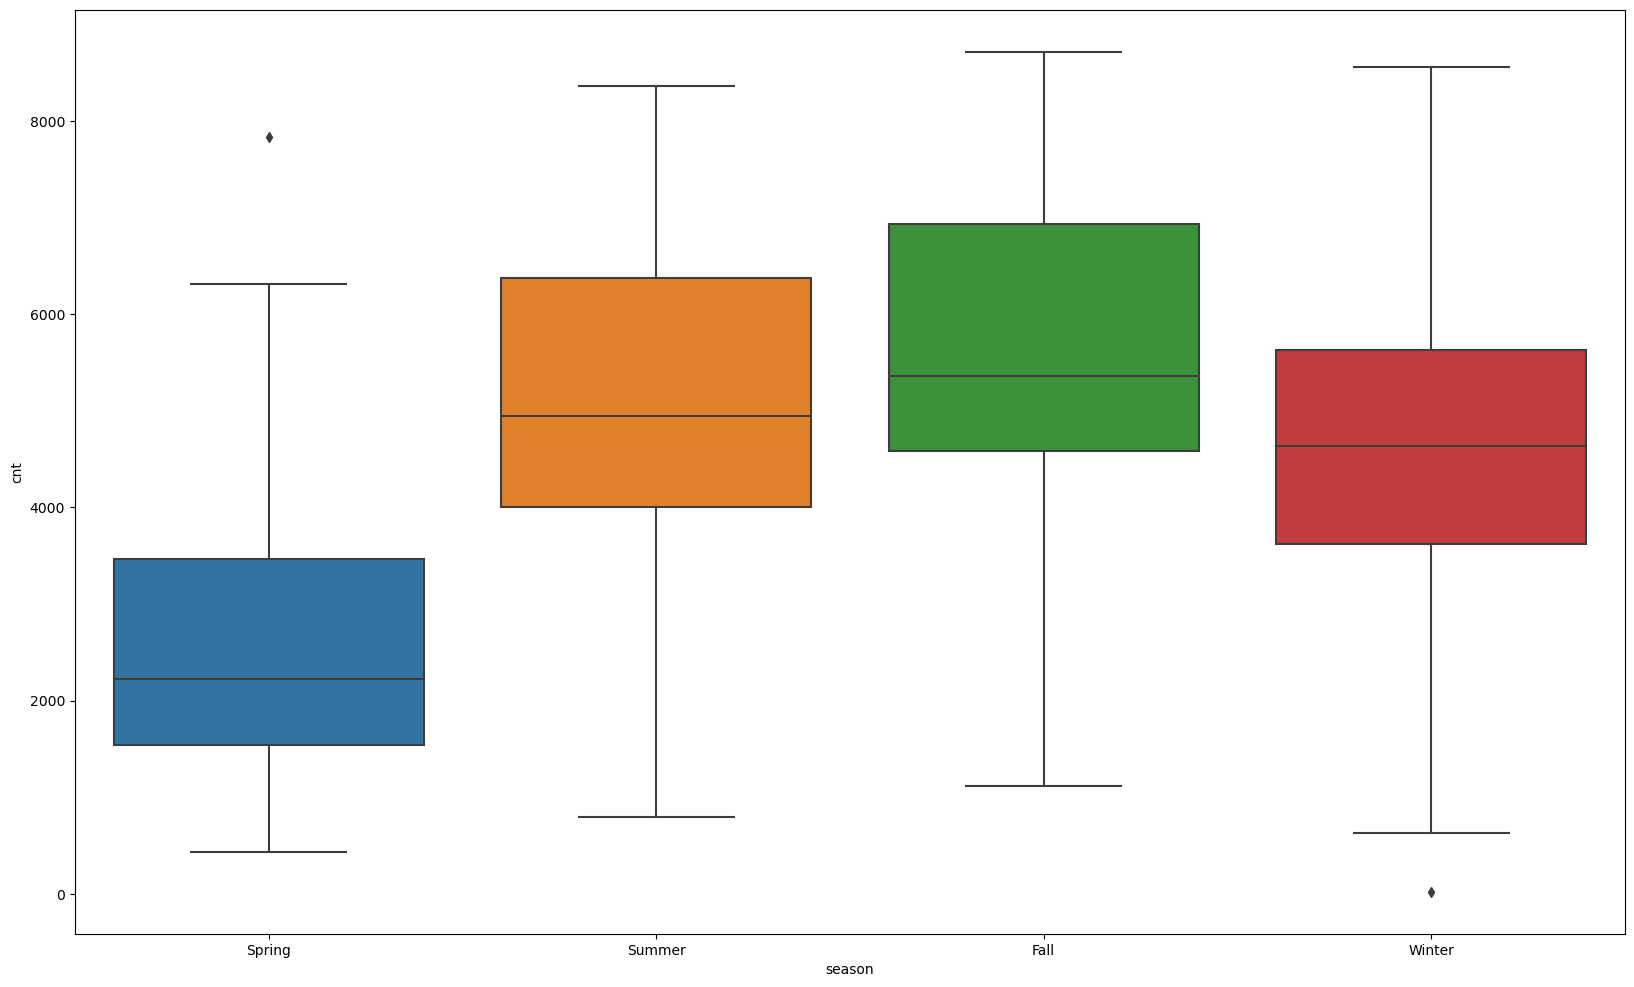

Variable :  weathersit


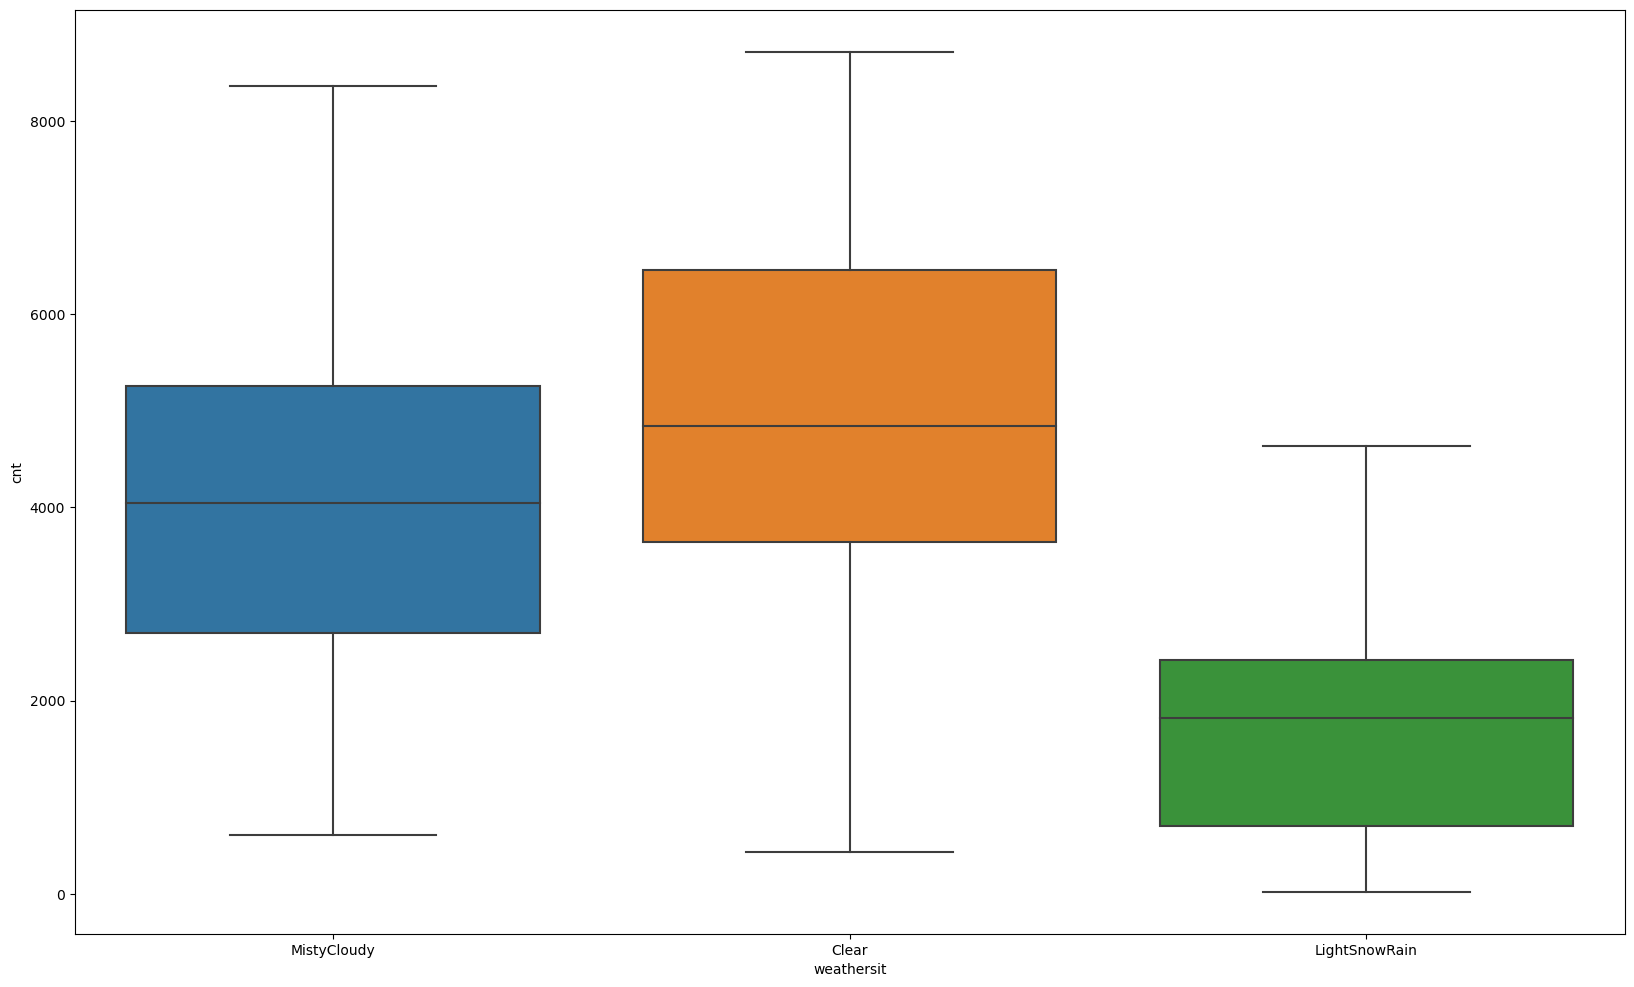

Variable :  weekday


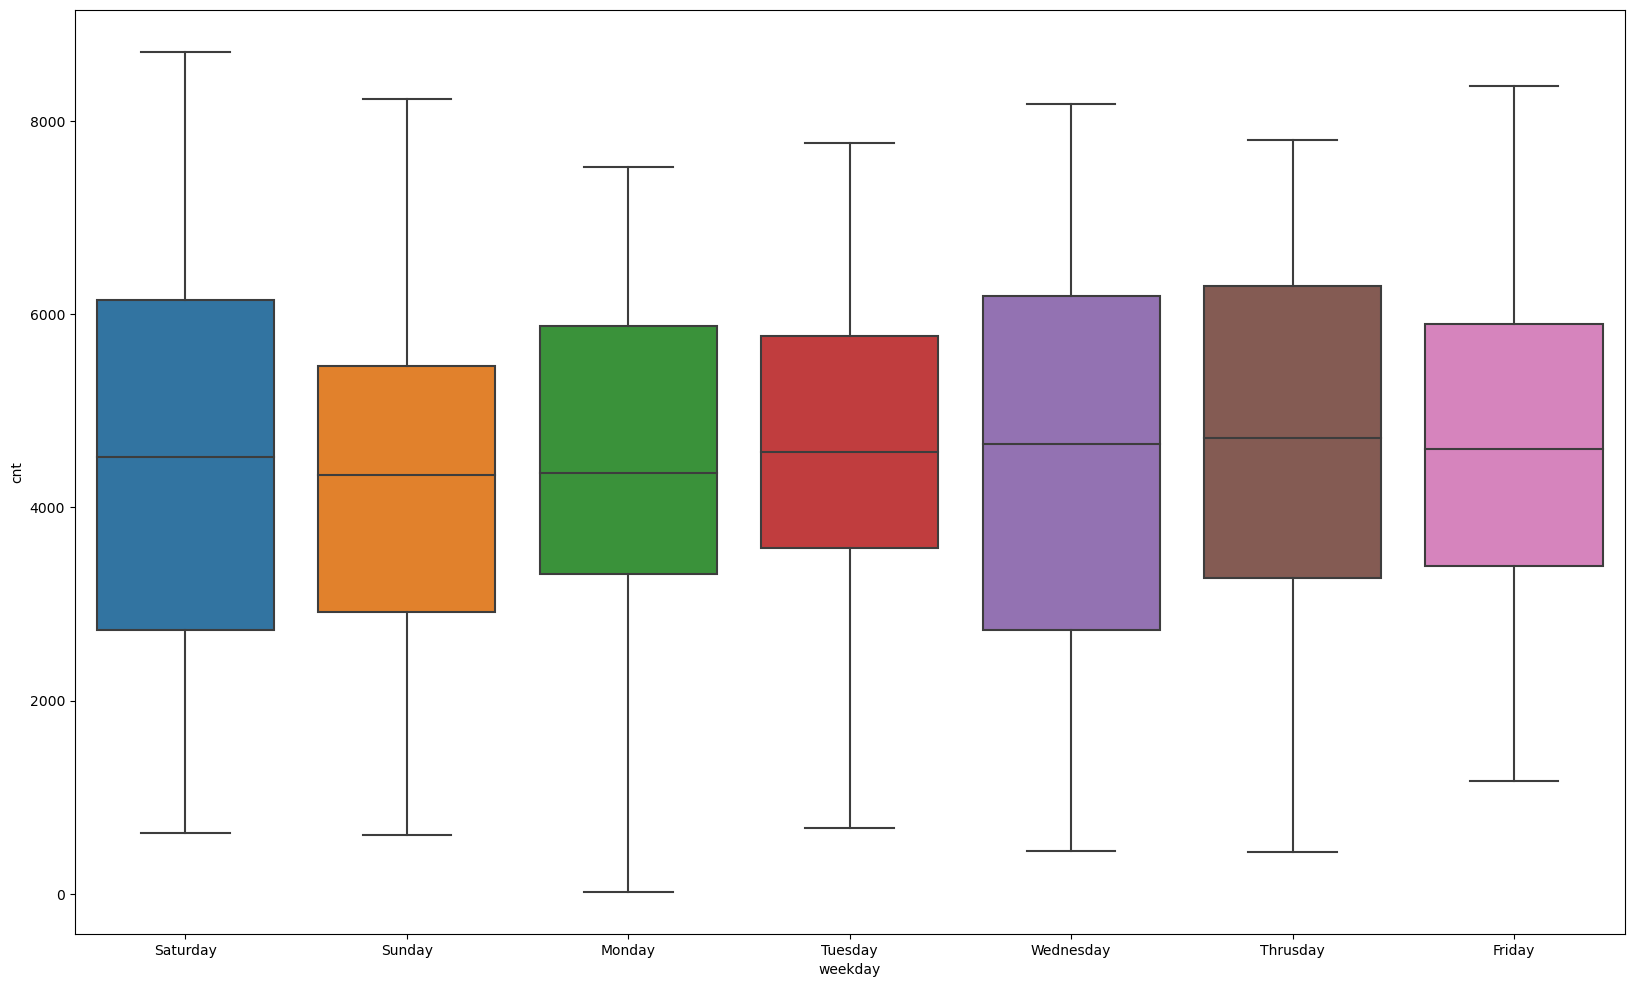

Variable :  yr


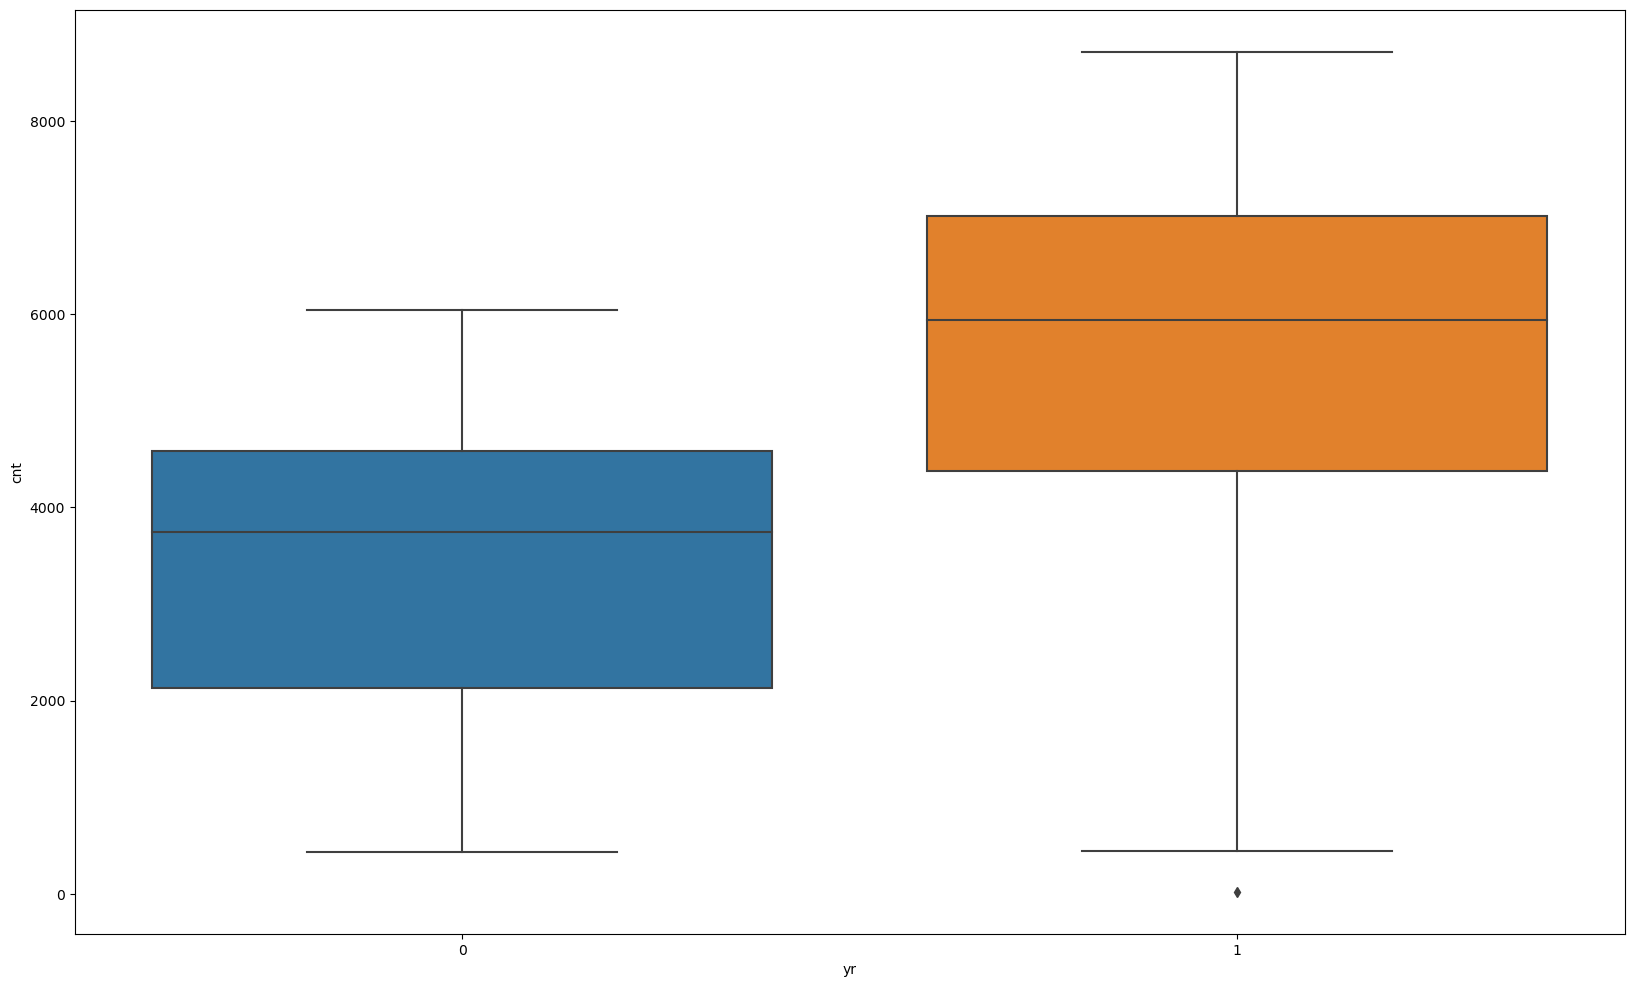

Variable :  holiday


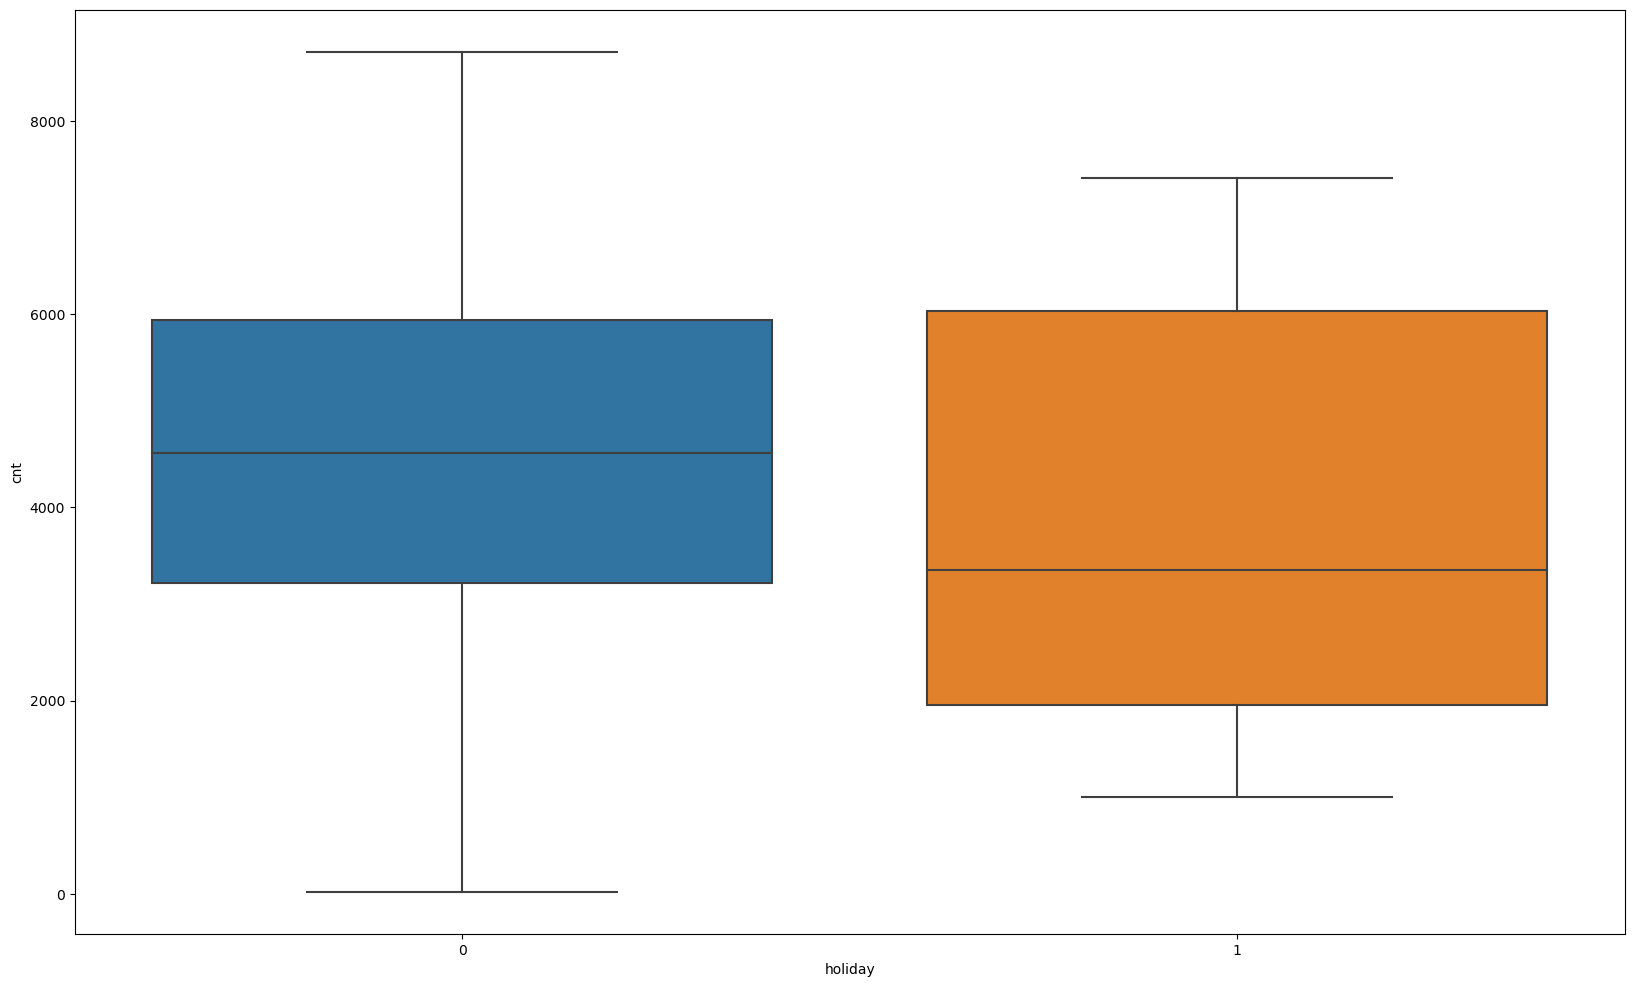

Variable :  workingday


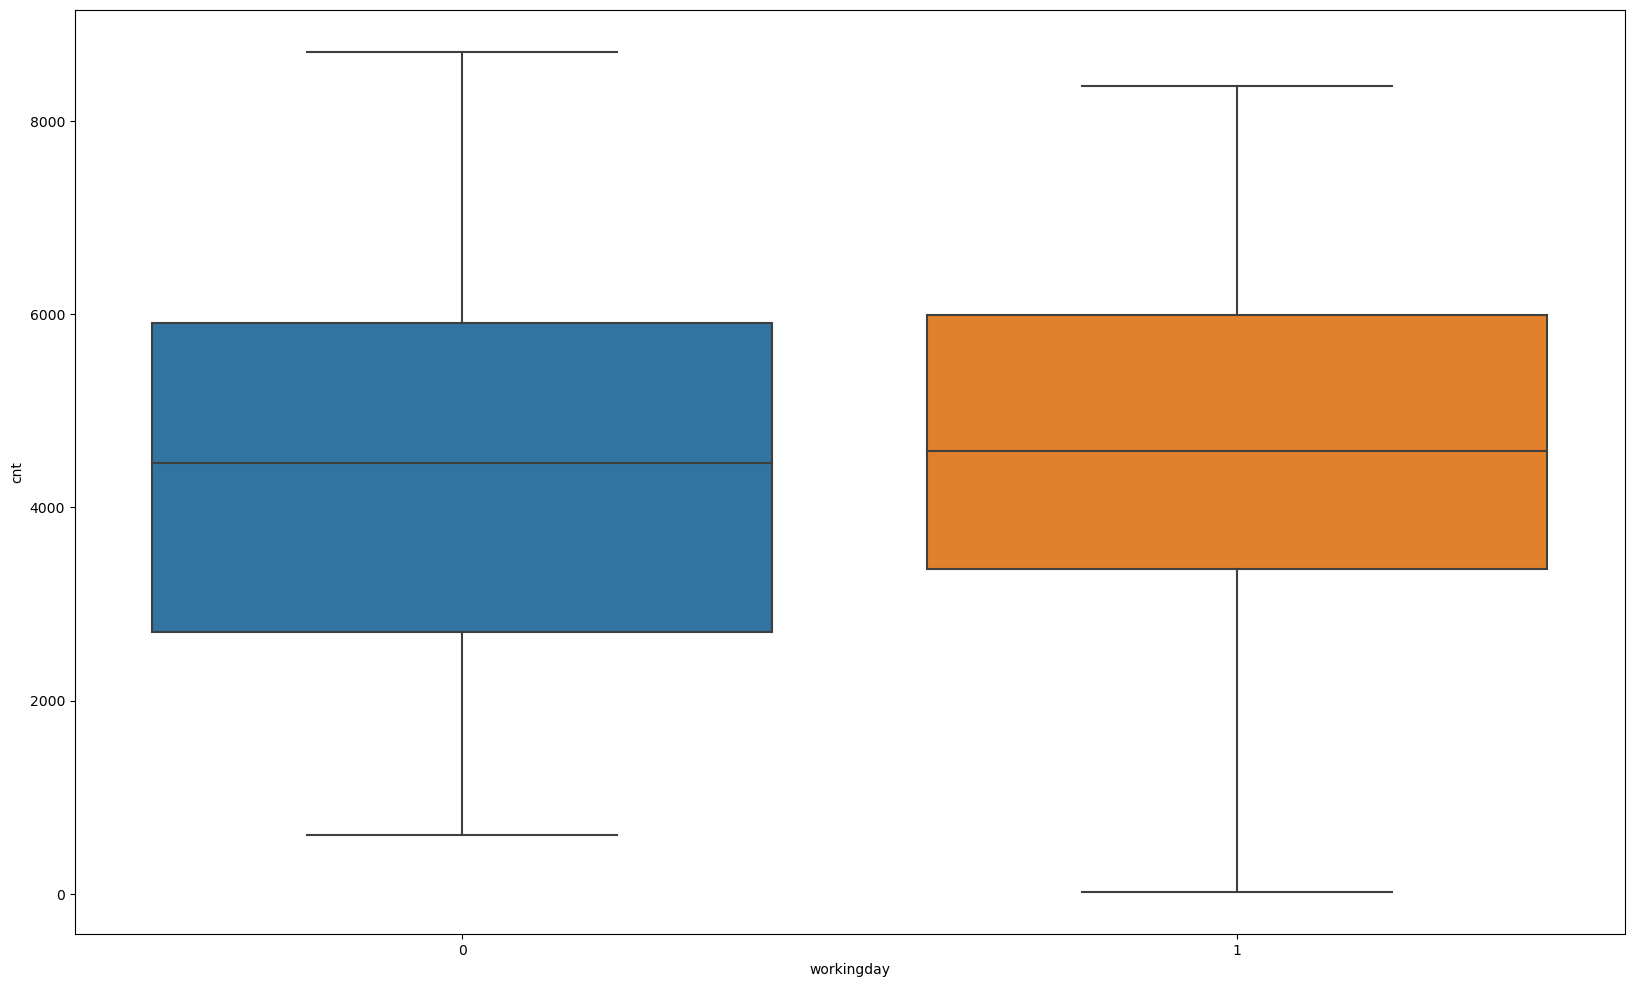

In [24]:
for i in cat_variable_list:
    print("Variable : ",i)
    plt.figure(figsize=(20, 12))
    sns.boxplot(x =i, y = 'cnt', data = df)
    plt.show()
    print("==============================================================================================")

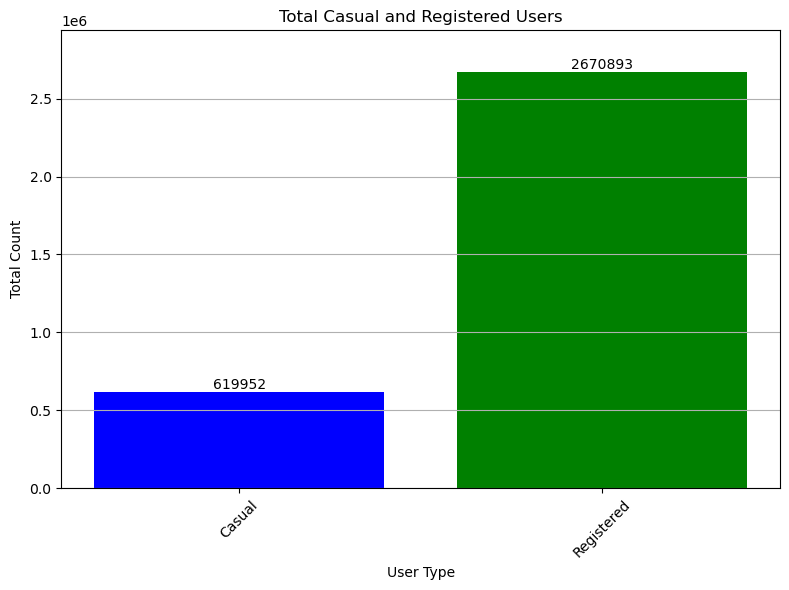

In [25]:
# Calculate the sum of 'casual' and 'registered'
sum_casual = df['casual'].sum()
sum_registered = df['registered'].sum()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(['Casual', 'Registered'], [sum_casual, sum_registered], color=['blue', 'green'])
plt.xlabel('User Type')
plt.ylabel('Total Count')
plt.title('Total Casual and Registered Users')
plt.xticks(rotation=45)
plt.ylim(0, max(sum_casual, sum_registered) * 1.1)  # Adjust ylim to provide some padding
plt.grid(axis='y')

# Adding text labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Key Obeservations from Exploratory Data Analysis
* 82% of the customer are registered users.
* Most of the customers are using rental bikes during clear weather ,misty cloudy 
* Majority of the customers are using rental bikes in summer and fall season
* customers usage of rental bike is very high from May month to Aug month
* Usage of rental bike is very less on holiday compared to non-holiday.

### Step 5 : Data Preparation For Model Building

In [26]:
#create dummies for categorical variables wherever number of categories > 2 in the data. 
df_dummy = df[['season','mnth','weekday','weathersit']]
df_dummy = pd.get_dummies(df_dummy,drop_first=True,dtype=int)
# Adding the dummy variables to the original dataset
df = pd.concat([df_dummy,df],axis = 1)

* cnt is the dependent variable
* since cnt is sum of casual and registered users, lets delete both the columns and keep only cnt

In [27]:
df.drop(columns=['casual', 'registered'], inplace=True)

In [28]:
#splitting data into training and testing

In [29]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
df_train.shape

(510, 35)

In [31]:
df_test.shape

(219, 35)

In [32]:
df_train.shape

(510, 35)

In [33]:
# Rescaling the data using standardization 

In [34]:
scaler = StandardScaler()

In [35]:
df_train.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_LightSnowRain',
       'weathersit_MistyCloudy', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'week'],
      dtype='object')

In [36]:
num_vars = ['cnt','hum','windspeed','temp','atemp','week']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [37]:
df_train.shape

(510, 35)

/tmp/ipykernel_832/2405651192.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


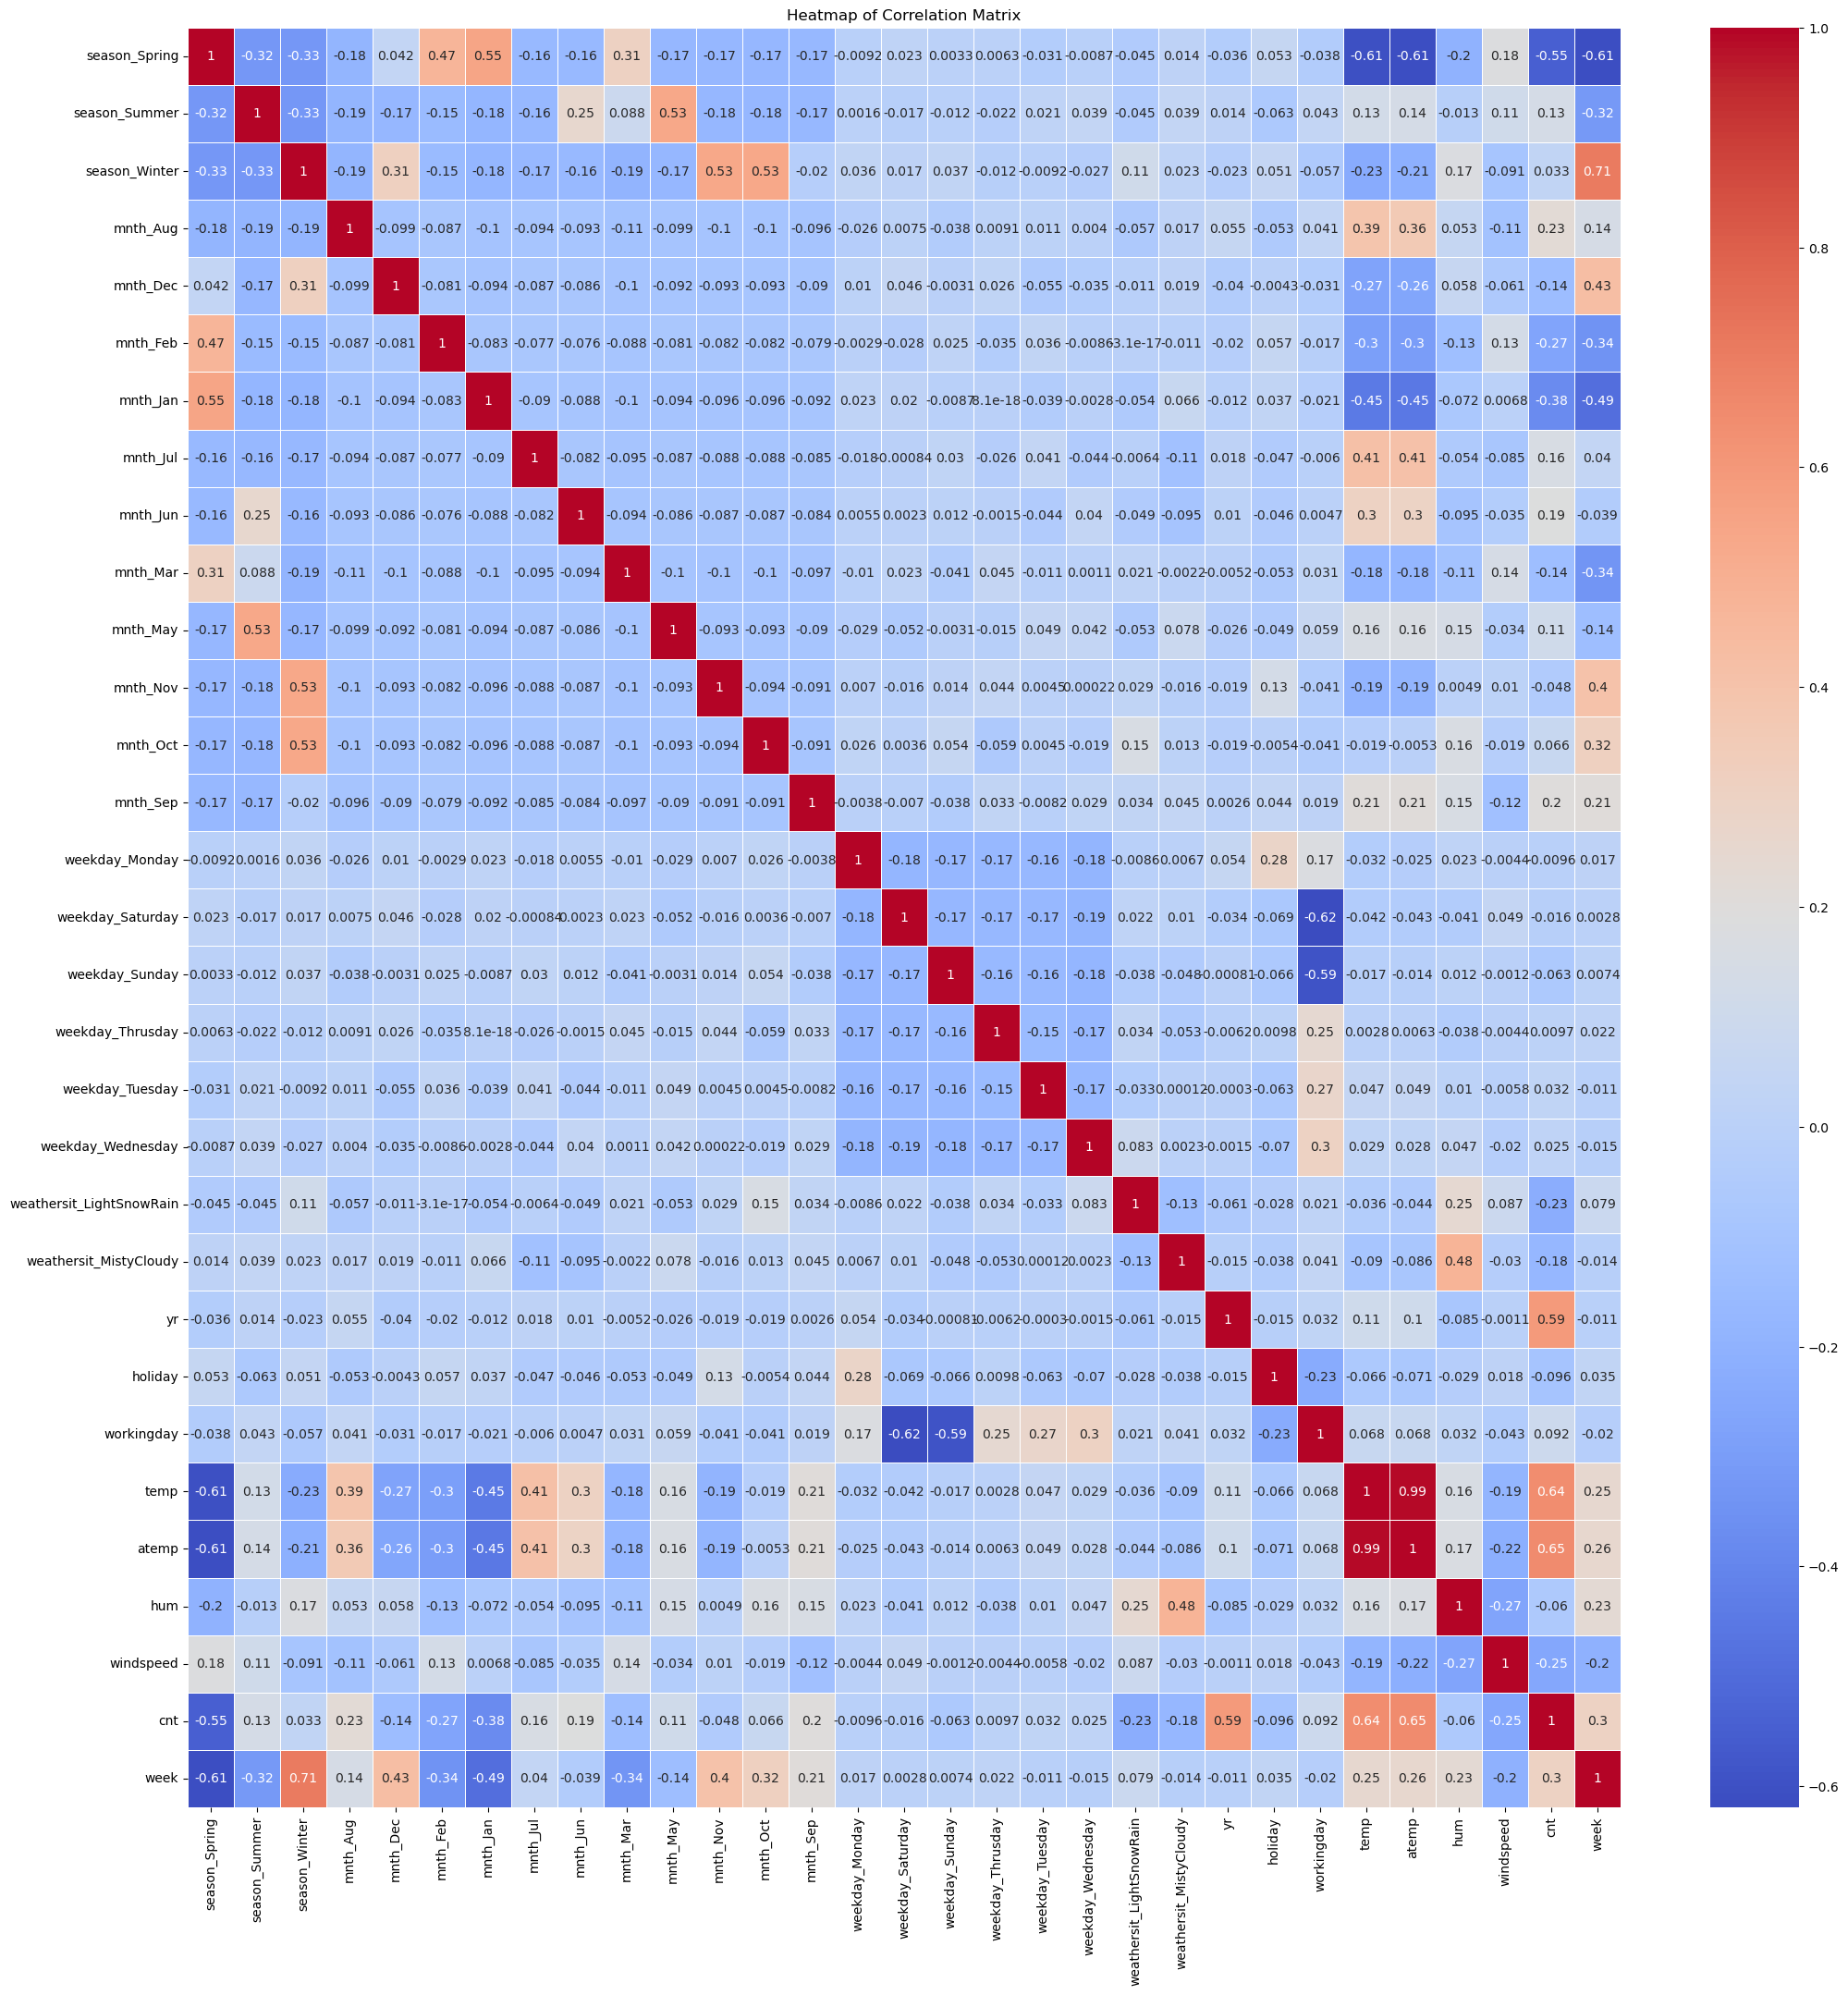

In [38]:
# Heatmap using Seaborn
plt.figure(figsize=(25, 25))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

temp variable is having very high correlation (0.99) with temp , since feeling temperature is important for bike usage ,lets keep atemp and delete temp variable

In [39]:
df_train.drop(columns=['temp'], inplace=True)

In [40]:
df_train.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_LightSnowRain',
       'weathersit_MistyCloudy', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'atemp', 'hum', 'windspeed', 'cnt', 'week'],
      dtype='object')

In [41]:
df_train.shape

(510, 34)

In [42]:
df_train.shape

(510, 34)

In [43]:
df_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,week
653,0,0,1,0,0,0,0,0,0,0,...,Oct,0,Tuesday,1,Clear,-0.055878,-0.514725,-0.117752,1.562685,1.020205
576,0,0,0,0,0,0,0,1,0,0,...,Jul,0,Tuesday,1,Clear,1.194106,0.516433,-0.330615,1.399629,0.294536
426,1,0,0,0,0,0,0,0,0,1,...,Mar,0,Saturday,0,MistyCloudy,-0.348834,-0.069854,-0.385694,-0.215554,-1.156801
728,1,0,0,0,1,0,0,0,0,0,...,Dec,0,Sunday,0,Clear,-1.473492,-1.045032,2.018143,-1.379511,-1.684560
482,0,1,0,0,0,0,0,0,0,0,...,Apr,0,Saturday,0,MistyCloudy,-0.571474,-1.000840,-0.779889,-0.136589,-0.629042


In [44]:
# Drop 'season','yr','mnth','holiday','weekday','workingday','weathersit' as we have created the dummies for it
df_train.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [45]:
df_train.shape

(510, 30)

In [46]:
df_train.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_LightSnowRain',
       'weathersit_MistyCloudy', 'yr', 'holiday', 'workingday', 'atemp', 'hum',
       'windspeed', 'cnt', 'week'],
      dtype='object')

### Step 6: Model Building

In [47]:
#Lets build the model using all the dependent variables and improve it using RFE method

In [48]:
y_train=df_train["cnt"]
#a = df_train.pop('cnt')
X_train = df_train.drop(columns=['cnt'])


In [49]:
X_train['yr'] = X_train['yr'].astype(int)

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   season_Spring             510 non-null    int64  
 1   season_Summer             510 non-null    int64  
 2   season_Winter             510 non-null    int64  
 3   mnth_Aug                  510 non-null    int64  
 4   mnth_Dec                  510 non-null    int64  
 5   mnth_Feb                  510 non-null    int64  
 6   mnth_Jan                  510 non-null    int64  
 7   mnth_Jul                  510 non-null    int64  
 8   mnth_Jun                  510 non-null    int64  
 9   mnth_Mar                  510 non-null    int64  
 10  mnth_May                  510 non-null    int64  
 11  mnth_Nov                  510 non-null    int64  
 12  mnth_Oct                  510 non-null    int64  
 13  mnth_Sep                  510 non-null    int64  
 14  weekday_M

In [51]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 510 entries, 653 to 79
Series name: cnt
Non-Null Count  Dtype  
--------------  -----  
510 non-null    float64
dtypes: float64(1)
memory usage: 8.0 KB


In [52]:
#building statistical model as we get more parameters to decide the best fit model
# Add a constant
X_train_lm = sm.add_constant(X_train)


In [53]:
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [54]:
lr.params

const                      -0.393434
season_Spring              -0.226772
season_Summer               0.146374
season_Winter               0.435221
mnth_Aug                    0.088323
mnth_Dec                   -0.384307
mnth_Feb                   -0.147032
mnth_Jan                   -0.272570
mnth_Jul                   -0.145106
mnth_Jun                    0.039027
mnth_Mar                    0.013378
mnth_May                    0.140079
mnth_Nov                   -0.339961
mnth_Oct                   -0.073564
mnth_Sep                    0.314836
weekday_Monday             -0.119580
weekday_Saturday            0.043202
weekday_Sunday             -0.200752
weekday_Thrusday           -0.059873
weekday_Tuesday            -0.099911
weekday_Wednesday          -0.037128
weathersit_LightSnowRain   -1.133589
weathersit_MistyCloudy     -0.278523
yr                          1.043314
holiday                    -0.296876
workingday                  0.060993
atemp                       0.398138
h

In [55]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.22
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          2.93e-179
Time:                        18:15:55   Log-Likelihood:                -237.94
No. Observations:                 510   AIC:                             533.9
Df Residuals:                     481   BIC:                             656.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [56]:
#Adj. R2 is 0.84 which means model is able to explain 85% of the variance in the data. Lets try to improve the model by feature selection & variable reduction techniques

In [57]:
# Running RFE with the output number of the variable equal to 20
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(estimator=lr, n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 9),
 ('mnth_Mar', False, 10),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 4),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 3),
 ('weekday_Thrusday', False, 7),
 ('weekday_Tuesday', False, 5),
 ('weekday_Wednesday', False, 8),
 ('weathersit_LightSnowRain', True, 1),
 ('weathersit_MistyCloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('week', False, 2)]

In [58]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sep', 'weekday_Saturday', 'weathersit_LightSnowRain',
       'weathersit_MistyCloudy', 'yr', 'holiday', 'workingday', 'atemp', 'hum',
       'windspeed'],
      dtype='object')

In [59]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday', 'week'],
      dtype='object')

In [60]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [61]:
#lets build the model and with the variables recomendded by RFE method
X_train_rfe_lm = sm.add_constant(X_train_rfe)

In [62]:
lmrfe = sm.OLS(y_train,X_train_rfe_lm).fit() 

In [63]:
print(lmrfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.7
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          2.88e-186
Time:                        18:15:55   Log-Likelihood:                -241.16
No. Observations:                 510   AIC:                             524.3
Df Residuals:                     489   BIC:                             613.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [64]:
#lets remove variables with p-value > 0.05 one at a time and then calculate vif

In [65]:
X_train_rfe.drop(columns=['mnth_Oct'],inplace=True)

/tmp/ipykernel_832/939722529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_rfe.drop(columns=['mnth_Oct'],inplace=True)


In [66]:
X_train_rfe_lm = sm.add_constant(X_train_rfe)
lmrfe = sm.OLS(y_train,X_train_rfe_lm).fit() 
print(lmrfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.3
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          2.39e-187
Time:                        18:15:56   Log-Likelihood:                -241.18
No. Observations:                 510   AIC:                             522.4
Df Residuals:                     490   BIC:                             607.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [67]:
#deleting season_Summer as it has p-value > 0.05
X_train_rfe.drop(columns=['season_Summer'],inplace=True)

/tmp/ipykernel_832/904209942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_rfe.drop(columns=['season_Summer'],inplace=True)


In [68]:
X_train_rfe_lm = sm.add_constant(X_train_rfe)
lmrfe = sm.OLS(y_train,X_train_rfe_lm).fit() 
print(lmrfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.6
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          2.17e-188
Time:                        18:15:56   Log-Likelihood:                -241.31
No. Observations:                 510   AIC:                             520.6
Df Residuals:                     491   BIC:                             601.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [69]:
#p-value of all the columns is less than 0.05 which means all of them are statistically significant ,
#lets verify the multi-collinearity in the independent variables

In [70]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,season_Spring,4.15
15,atemp,3.28
14,workingday,3.23
1,season_Winter,2.82
4,mnth_Jan,2.49
11,weathersit_MistyCloudy,2.24
3,mnth_Feb,1.95
12,yr,1.95
16,hum,1.90
7,mnth_Nov,1.89


In [71]:
#lets build the model and with the variables recomendded by RFE method
X_train_rfe_lm = sm.add_constant(X_train_rfe)


In [72]:
lmrfe = sm.OLS(y_train,X_train_rfe_lm).fit() 

In [73]:
print(lmrfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.6
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          2.17e-188
Time:                        18:15:57   Log-Likelihood:                -241.31
No. Observations:                 510   AIC:                             520.6
Df Residuals:                     491   BIC:                             601.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [74]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,season_Spring,4.15
15,atemp,3.28
14,workingday,3.23
1,season_Winter,2.82
4,mnth_Jan,2.49
11,weathersit_MistyCloudy,2.24
3,mnth_Feb,1.95
12,yr,1.95
16,hum,1.90
7,mnth_Nov,1.89



### Step 7: Validation of assumptions to build the linear regression model

### Assumptions
* Linear relationship between X and Y.<br>
* Error terms are normally distributed (not X, Y).<br>
* Error terms have constant variance (homoscedasticity)
* Error terms are independent of each other.

In [75]:
#Verifying the assumption "Error terms are normally distributed (not X, Y)"
X_train_rfe.shape

(510, 18)

In [76]:
y_train_cnt = lmrfe.predict(X_train_rfe_lm)

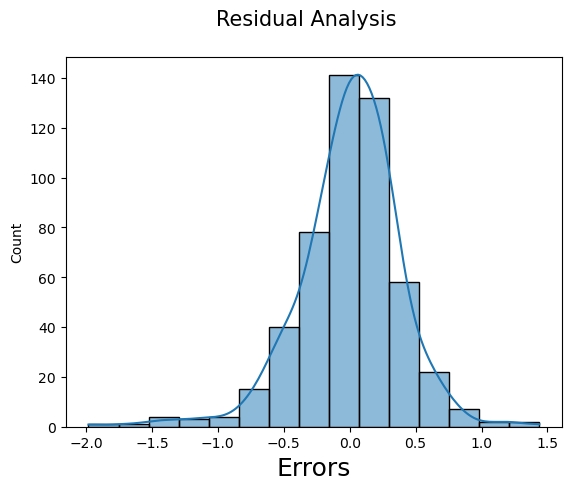

In [77]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_train - y_train_cnt), bins = 15, kde=True)
fig.suptitle('Residual Analysis', fontsize = 15)                  
plt.xlabel('Errors', fontsize = 18)
plt.show()

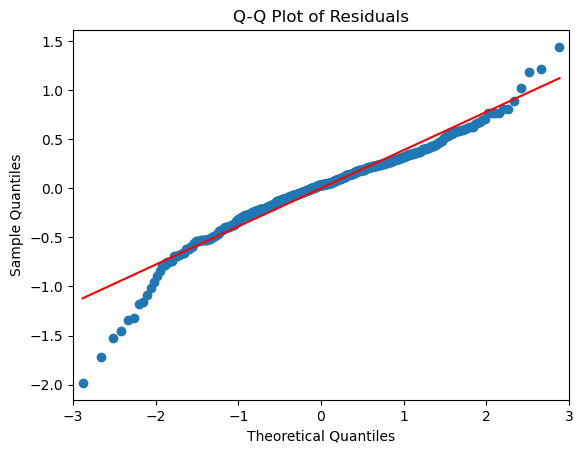

In [78]:
# Create Q-Q plot for residuals
residuals=lmrfe.resid
sm.qqplot(residuals, line='s')  
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

#### The graph indicates that the error terms are normally distributed with mean is 0.

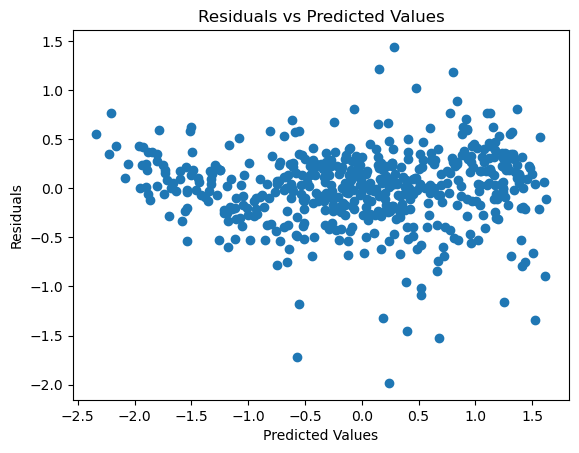

In [79]:
#lets verify assumption 2 - homoscedasticity
res = (y_train - y_train_cnt)
# Plot the residuals
plt.scatter(y_train_cnt, res)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

#### We do not see any pattern in the residual vs predicted values ,hence the homoscedasticity assumption holds

In [80]:
#Verifying the assumption "Error terms are independent of each other."
from statsmodels.stats.stattools import durbin_watson

# Assuming 'model' is your fitted regression model
residuals = lmrfe.resid

# Calculate Durbin-Watson statistic
durbin_watson_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {durbin_watson_stat}')


Durbin-Watson statistic: 2.024727888358925


#### Durbin-Watson statistic result is 2.02 which indicates no auto correlation and the values are significantly different from each other  

### Observations from the model
* R2 is 84.8%, which means 84.8% of the variance in dependent variable is being explained by the variables included in the model
* all the variables are having p-value less than 0.05 which means they are statistically significant
* AIC & BIC are very low which is indicating good fit of the model
* Adj R2 is 84.3% which is slightely lesser than R2 , which means additional variables in the model are meaningfully explaining the variance in dependent variable.
* F-statistics(161.9) with low p-value(6.31e-189) indicates that the independent variables are having significant impact on dependent variable .

### Our best fit line is
y=-0.4945-0.3743*season_Spring
    +0.3413*season_Winter
    -0.2639*mnth_Dec
    -0.1844*mnth_Feb
    -0.3283*mnth_Jan
    -0.2476*mnth_Jul
    +0.1497*mnth_May
    -0.2480*mnth_Nov
    +0.2831*mnth_Sep
    +0.2458*weekday_Saturday
    -1.1353*weathersit_LightSnowRain
    -0.2722*weathersit_MistyCloudy
    +1.0402*yr
    -0.1976*holiday
    +0.1987*workingday
    +0.4063*atemp
    -0.0971*hum
    -0.1282*windspeed

### step 8 : Testing Model On Test Data

In [81]:
#scaling the data 
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [82]:
df_test.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,week
184,0,0,0,0,0,0,0,1,0,0,...,1,Monday,0,MistyCloudy,1.170175,1.088683,0.126863,-1.435825,0.789750,0.053940
535,0,1,0,0,0,0,0,0,1,0,...,0,Wednesday,1,Clear,1.468552,1.424151,-0.190908,-1.000254,0.878437,-0.081064
299,0,0,1,0,0,0,0,0,0,0,...,0,Thrusday,1,MistyCloudy,-0.201477,-0.169495,1.340150,0.130692,-0.996668,1.133970
221,0,0,0,1,0,0,0,0,0,0,...,0,Wednesday,1,Clear,1.383939,1.206825,-1.355081,0.164303,0.123011,0.391449
152,0,1,0,0,0,0,0,0,1,0,...,0,Thrusday,1,Clear,1.107825,0.959013,-2.181274,1.404071,0.222256,-0.283570


In [83]:
df_test.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,week
184,0,0,0,0,0,0,0,1,0,0,...,1,Monday,0,MistyCloudy,1.170175,1.088683,0.126863,-1.435825,0.789750,0.053940
535,0,1,0,0,0,0,0,0,1,0,...,0,Wednesday,1,Clear,1.468552,1.424151,-0.190908,-1.000254,0.878437,-0.081064
299,0,0,1,0,0,0,0,0,0,0,...,0,Thrusday,1,MistyCloudy,-0.201477,-0.169495,1.340150,0.130692,-0.996668,1.133970
221,0,0,0,1,0,0,0,0,0,0,...,0,Wednesday,1,Clear,1.383939,1.206825,-1.355081,0.164303,0.123011,0.391449
152,0,1,0,0,0,0,0,0,1,0,...,0,Thrusday,1,Clear,1.107825,0.959013,-2.181274,1.404071,0.222256,-0.283570


In [84]:
y_test = df_test['cnt']
X_test = df_test.drop(columns=['cnt'])

In [85]:
final_features = X_train_rfe.columns
final_features

Index(['season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_May', 'mnth_Nov', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_LightSnowRain', 'weathersit_MistyCloudy', 'yr', 'holiday',
       'workingday', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [86]:
X_test=X_test[final_features]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     219 non-null    float64
 1   season_Spring             219 non-null    int64  
 2   season_Winter             219 non-null    int64  
 3   mnth_Dec                  219 non-null    int64  
 4   mnth_Feb                  219 non-null    int64  
 5   mnth_Jan                  219 non-null    int64  
 6   mnth_Jul                  219 non-null    int64  
 7   mnth_May                  219 non-null    int64  
 8   mnth_Nov                  219 non-null    int64  
 9   mnth_Sep                  219 non-null    int64  
 10  weekday_Saturday          219 non-null    int64  
 11  weathersit_LightSnowRain  219 non-null    int64  
 12  weathersit_MistyCloudy    219 non-null    int64  
 13  yr                        219 non-null    int64  
 14  holiday  

In [87]:
## Making predictions

y_pred = lmrfe.predict(X_test)

Text(0, 0.5, 'y_pred')

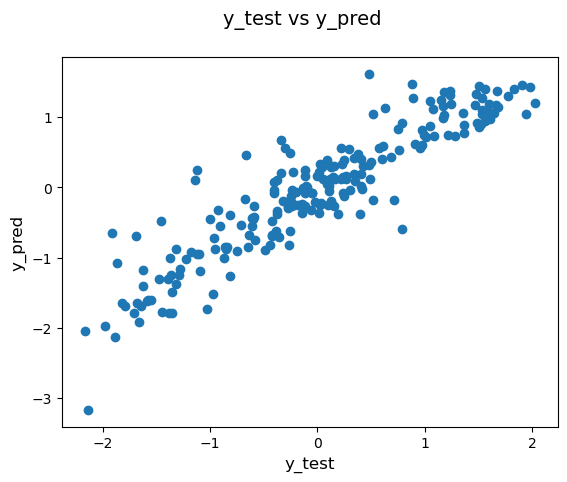

In [88]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 14)          
plt.xlabel('y_test', fontsize = 12)                          
plt.ylabel('y_pred', fontsize = 12)  

In [89]:
# Example for regression metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R-squared: {r2:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

R-squared: 0.83
MAE: 0.31
MSE: 0.17
RMSE: 0.41


### Conclusion:
* The model shows strong performance with an R-squared of 0.83 on the test data, indicating that it explains a significant portion of the variability in bike rental counts.
* The MAE, MSE, and RMSE values also suggest that the model's predictions are reasonably accurate and consistent.
* Given these metrics, and considering the complexity of having 17 variables, the model appears to be effective and well-suited for predicting bike rental counts.

### Recommendations from the mdoel
* co-efficient of yr is 1.04(positive), it suggests the business is expanding with time ,So i would recommend
  you to continue to invest and promote the product.
* season_Winter has co-efficient of 0.34 (positive),it suggests that usage of bike is more during winters,So i would recommend you to have sufficient bikes for users and good customer service to keep the trust.
* in Nov,dec,jan & feb have negative co-efficients , it suggests that usage of bike is less in these months.
  it could be because of extreme low temperature , snow and not suitable weather to use the bike. So i would recommend you to plan accordingly as the demand will be less in these conditions.
* surprisingly season_Spring has negative co-efficient (-0.3760), there is scope for improvement in business during spring season. run compaign ,offer attractive discounts and promote the business.
* workingday has 0.19 co-efficient(positive), it suggests that usage of rental bikes is high during working days, may be the customers are using it for their work.
* atemp has 0.40 co-efficient (positive) which is significant, better feeling temperature encouraging customers to use rental bikes.
* hum and windspeed have negative co-efficient, customers are avoiding usage of rental bikes during conditions which are not suitable for riding.